In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy import stats
import folium as folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx





### Lectura del archivo Kansas.json

In [2]:
df= pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Kansas\Kansas.json",lines=True)

In [3]:
df.head()

,user_id,name,rating,text,resp,gmap_id
0,1.094625e+20,Andrea Prince,1,Tried calling several times to see if they did...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684
1,1.039236e+20,Jeremy Boselly,5,"Great store, the staff here are very friendly ...",None,0x87c091088894fba3:0x6ffb97c6a5e2f684
2,1.092176e+20,Shannon Gustafson,5,I drop off ready to ship packages so nothing t...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684
3,1.120702e+20,Gabriel Turner,5,This ups store has friendly customer service. ...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684
4,1.031161e+20,Bridget Kiggins,5,My favorite UPS store! I'm in here often to pi...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684


### Lectura del archivo "df_gastronomico_ciudades.json "

In [4]:
df2=pd.read_json(r"C:\Users\jessi\Desktop\Horizon_Project\Washington\df_gastronomico_ciudades.json",lines=True)

In [5]:
df2.head()

,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
1,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."
2,Noodle Cafe,233 Peachtree St # B70,Atlanta,GA 30303,GA,30303,0x88f5047831dfc86d:0x985e3a6645f5ca4f,33.760404,-84.386319,"[Thai restaurant, Restaurant]",4.2,35,None,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,Creole Orleans Catering & Food Truck,2841 Greenbriar Pkwy SW N317,Atlanta,GA 30331,GA,30331,0x88f503d71429c049:0xef40e07a5479b1c2,33.689032,-84.495097,"[Creole restaurant, Caribbean restaurant, Cate...",4.7,31,None,"{'Service options': ['Delivery', 'Takeout', 'D..."
4,Biswas Grocery and Cafe,2853 Buford Hwy NE,Atlanta,GA 30329,GA,30329,0x88f507f3e1cde31d:0x1bcd2bb2f0555399,33.831454,-84.341647,"[Organic food store, Convenience store, Phone ...",4.7,25,None,"{'Service options': ['Delivery', 'In-store sho..."


### Informacion General

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  1244 non-null   float64
 1   name     1244 non-null   object 
 2   rating   1244 non-null   int64  
 3   text     783 non-null    object 
 4   resp     105 non-null    object 
 5   gmap_id  1244 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 58.4+ KB
None


In [7]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nombre_local              18037 non-null  object 
 1   direccion                 18037 non-null  object 
 2   ciudad                    18037 non-null  object 
 3   codigo_postal_cod_ciudad  18037 non-null  object 
 4   codigo_ciudad             18037 non-null  object 
 5   codigo_postal             18037 non-null  object 
 6   gmap_id                   18037 non-null  object 
 7   latitude                  18037 non-null  float64
 8   longitude                 18037 non-null  float64
 9   category                  18037 non-null  object 
 10  avg_rating                18037 non-null  float64
 11  num_of_reviews            18037 non-null  int64  
 12  price                     8690 non-null   object 
 13  MISC                      17614 non-null  object 
dtypes: flo

### Descripción de los dataframe

In [8]:
df['rating'].describe()


count    1244.000000
mean        4.045016
std         1.317461
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [9]:
df2.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,18037.000000,18037.000000,18037.000000,18037.000000
mean,38.290007,-92.404179,4.137573,70.622276
std,4.948144,18.621202,0.575608,143.090909
min,25.993710,-122.805295,1.000000,1.000000
25%,34.055071,-118.186637,3.900000,17.000000
50%,39.943207,-86.808270,4.200000,38.000000
75%,40.831310,-74.145373,4.500000,78.000000
max,47.682747,-71.145040,5.000000,5321.000000


### Análisis de Datos Nulos

In [10]:
print(df.isnull().sum())


user_id       0
name          0
rating        0
text        461
resp       1139
gmap_id       0
dtype: int64


In [11]:
print(df2.isnull().sum())


nombre_local                   0
direccion                      0
ciudad                         0
codigo_postal_cod_ciudad       0
codigo_ciudad                  0
codigo_postal                  0
gmap_id                        0
latitude                       0
longitude                      0
category                       0
avg_rating                     0
num_of_reviews                 0
price                       9347
MISC                         423
dtype: int64


### Outliers

Outliers en la columna 'rating' usando IQR:
Series([], Name: rating, dtype: int64)
Outliers en la columna 'rating' usando Z-score:
Series([], Name: rating, dtype: int64)


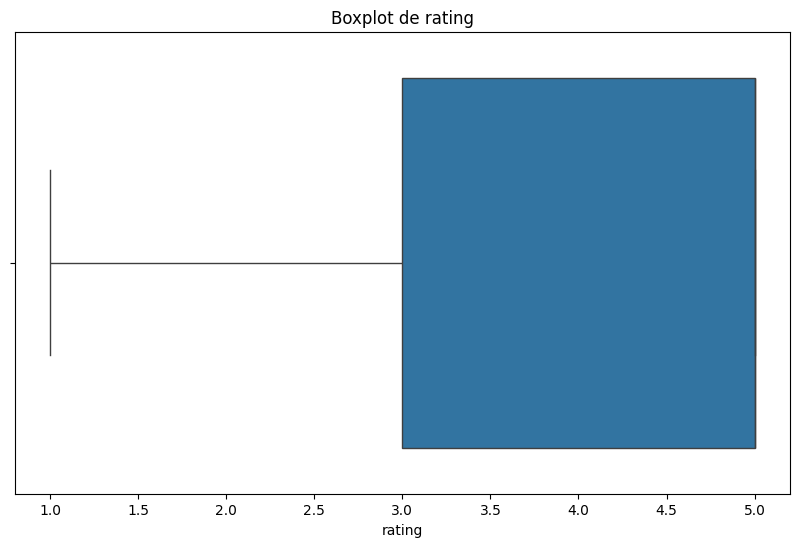

In [12]:
rating = df['rating']

# Calcular el IQR para la columna 'rating'
Q1 = rating.quantile(0.25)
Q3 = rating.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando IQR
outliers_iqr = rating[(rating < (Q1 - 1.5 * IQR)) | (rating > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'rating' usando IQR:")
print(outliers_iqr)

# Calcular Z-score para la columna 'rating'
z_scores = stats.zscore(rating)
abs_z_scores = abs(z_scores)

# Identificar outliers con Z-score mayor que 3
outliers_z = rating[abs_z_scores > 3]
print("Outliers en la columna 'rating' usando Z-score:")
print(outliers_z)

# Graficar el boxplot para 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(x=rating)
plt.title('Boxplot de rating')
plt.show()


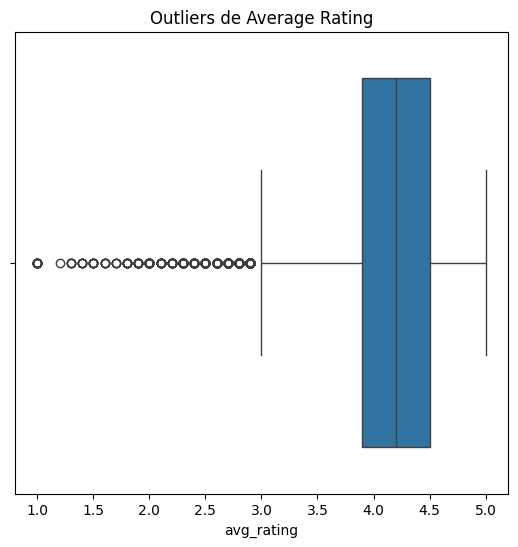

In [13]:


columns_to_check = ['avg_rating']

Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df2[(df2[columns_to_check] < (Q1 - 1.5 * IQR)) | (df2[columns_to_check] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df2['avg_rating'])
plt.title('Outliers de Average Rating')



plt.show()



Outliers en la columna 'num_of_reviews' usando IQR:
124      798
206      178
217      496
224      214
229      768
        ... 
18019    238
18024    244
18027    292
18029    178
18031    238
Name: num_of_reviews, Length: 1371, dtype: int64
Outliers en la columna 'num_of_reviews' usando Z-score:
124       798
229       768
233      1018
237      3128
238      1373
         ... 
17884     798
17890    1108
17892    1208
17893    1351
17901     624
Name: num_of_reviews, Length: 171, dtype: int64


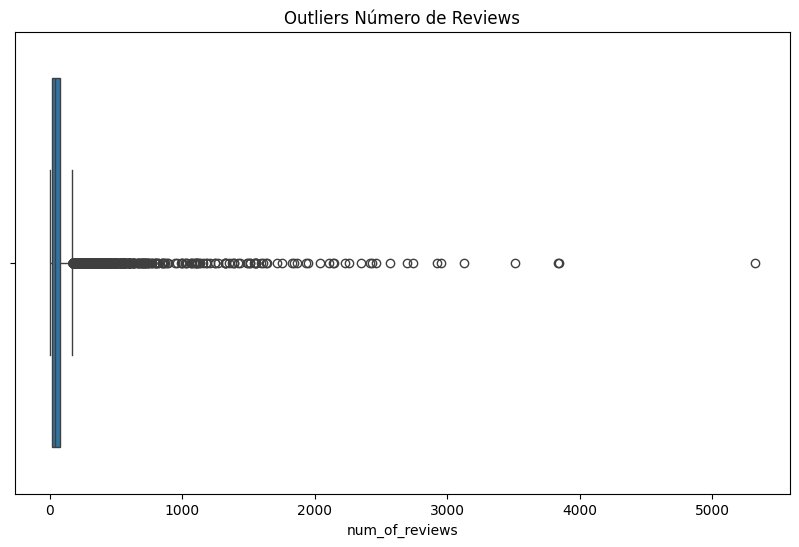

In [14]:

num_of_reviews = df2['num_of_reviews']

Q1 = num_of_reviews.quantile(0.25)
Q3 = num_of_reviews.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = num_of_reviews[(num_of_reviews < (Q1 - 1.5 * IQR)) | (num_of_reviews > (Q3 + 1.5 * IQR))]
print("Outliers en la columna 'num_of_reviews' usando IQR:")
print(outliers_iqr)

z_scores = stats.zscore(num_of_reviews)
abs_z_scores = abs(z_scores)

outliers_z = num_of_reviews[abs_z_scores > 3]
print("Outliers en la columna 'num_of_reviews' usando Z-score:")
print(outliers_z)

plt.figure(figsize=(10, 6))
sns.boxplot(x=num_of_reviews)
plt.title('Outliers Número de Reviews')
plt.show()


### Histogramas de distribución

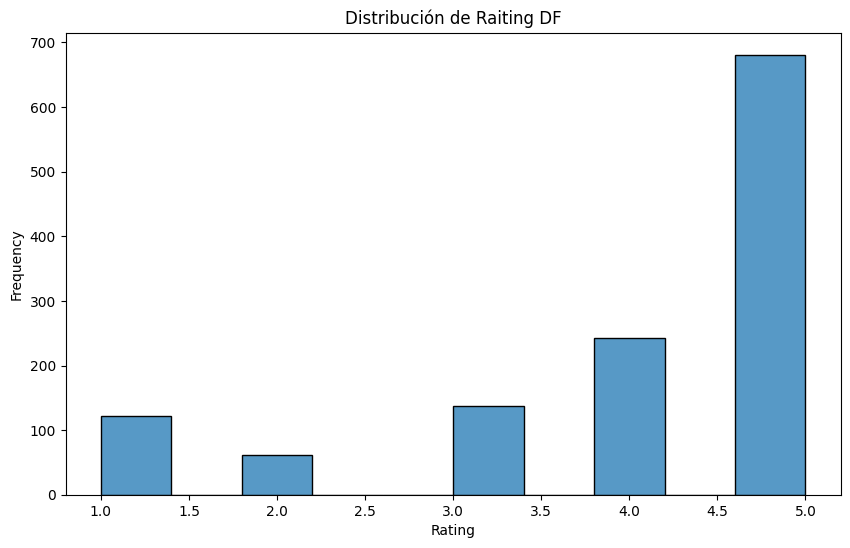

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10)
plt.title('Distribución de Raiting DF')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


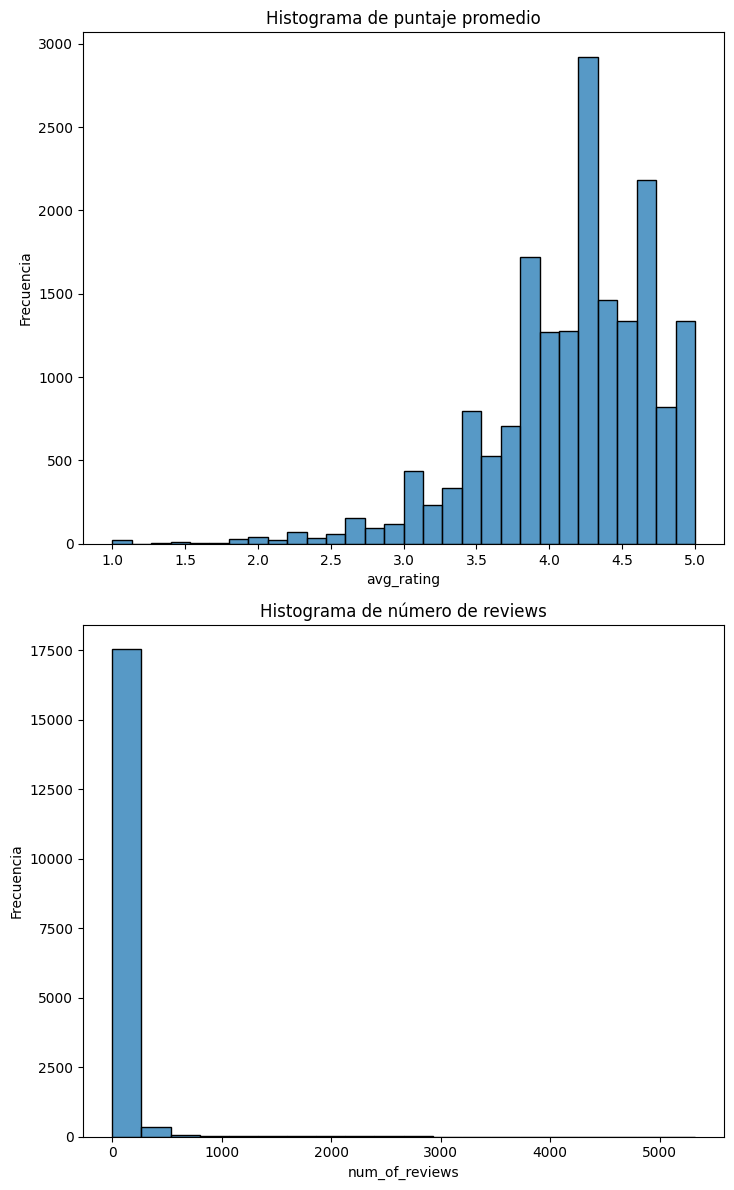

In [16]:
avg_rating = df2['avg_rating']
num_of_reviews = df2['num_of_reviews']

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(avg_rating, bins=30, kde=False)
plt.title('Histograma de puntaje promedio')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(num_of_reviews, bins=20, kde=False)
plt.title('Histograma de número de reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Análisis de sentimientos 

In [17]:
df['text'] = df['text'].fillna('')


In [18]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['review_sentiment'] = df['text'].apply(get_sentiment)

print(df[['text', 'review_sentiment']].head())


                                                text  review_sentiment
0  Tried calling several times to see if they did...          0.107143
1  Great store, the staff here are very friendly ...          0.541071
2  I drop off ready to ship packages so nothing t...          0.037500
3  This ups store has friendly customer service. ...          0.333333
4  My favorite UPS store! I'm in here often to pi...          0.379167


Text(0, 0.5, 'Frecuencia')

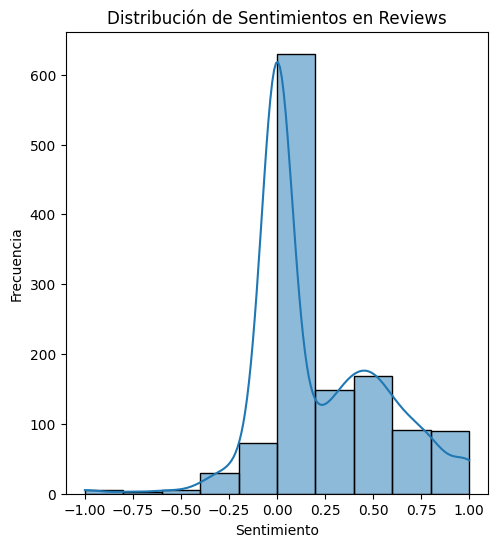

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['review_sentiment'], bins=10, kde=True)
plt.title('Distribución de Sentimientos en Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


### Unión de datasets

In [20]:
merged_df = pd.merge(df, df2, on='gmap_id', how='inner')


In [21]:
merged_df

,user_id,name,rating,text,resp,gmap_id,review_sentiment,nombre_local,direccion,ciudad,codigo_postal_cod_ciudad,codigo_ciudad,codigo_postal,latitude,longitude,category,avg_rating,num_of_reviews,price,MISC
0,1.094625e+20,Andrea Prince,1,Tried calling several times to see if they did...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684,0.107143,The UPS Store,22052 W 66th St,Shawnee,KS 66226,KS,66226,39.010490,-94.841498,"[Shipping and mailing service, Business center...",4.7,168,None,{'Accessibility': ['Wheelchair accessible entr...
1,1.039236e+20,Jeremy Boselly,5,"Great store, the staff here are very friendly ...",None,0x87c091088894fba3:0x6ffb97c6a5e2f684,0.541071,The UPS Store,22052 W 66th St,Shawnee,KS 66226,KS,66226,39.010490,-94.841498,"[Shipping and mailing service, Business center...",4.7,168,None,{'Accessibility': ['Wheelchair accessible entr...
2,1.092176e+20,Shannon Gustafson,5,I drop off ready to ship packages so nothing t...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684,0.037500,The UPS Store,22052 W 66th St,Shawnee,KS 66226,KS,66226,39.010490,-94.841498,"[Shipping and mailing service, Business center...",4.7,168,None,{'Accessibility': ['Wheelchair accessible entr...
3,1.120702e+20,Gabriel Turner,5,This ups store has friendly customer service. ...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684,0.333333,The UPS Store,22052 W 66th St,Shawnee,KS 66226,KS,66226,39.010490,-94.841498,"[Shipping and mailing service, Business center...",4.7,168,None,{'Accessibility': ['Wheelchair accessible entr...
4,1.031161e+20,Bridget Kiggins,5,My favorite UPS store! I'm in here often to pi...,None,0x87c091088894fba3:0x6ffb97c6a5e2f684,0.379167,The UPS Store,22052 W 66th St,Shawnee,KS 66226,KS,66226,39.010490,-94.841498,"[Shipping and mailing service, Business center...",4.7,168,None,{'Accessibility': ['Wheelchair accessible entr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1.068320e+20,masons famlley,5,,None,0x87c08e1b3b295555:0x758a0b44977636be,0.000000,4th street cafe,104 S 4th St #1465,Edwardsville,KS 66111,KS,66111,39.062072,-94.821790,[American restaurant],4.6,118,$,"{'Service options': ['Takeout', 'Delivery'], '..."
1240,1.136735e+20,Clay,5,,None,0x87c08e1b3b295555:0x758a0b44977636be,0.000000,4th street cafe,104 S 4th St #1465,Edwardsville,KS 66111,KS,66111,39.062072,-94.821790,[American restaurant],4.6,118,$,"{'Service options': ['Takeout', 'Delivery'], '..."
1241,1.135811e+20,Desiray Cantrell,5,,None,0x87c08e1b3b295555:0x758a0b44977636be,0.000000,4th street cafe,104 S 4th St #1465,Edwardsville,KS 66111,KS,66111,39.062072,-94.821790,[American restaurant],4.6,118,$,"{'Service options': ['Takeout', 'Delivery'], '..."
1242,1.009920e+20,Sean Stewart,4,,None,0x87c08e1b3b295555:0x758a0b44977636be,0.000000,4th street cafe,104 S 4th St #1465,Edwardsville,KS 66111,KS,66111,39.062072,-94.821790,[American restaurant],4.6,118,$,"{'Service options': ['Takeout', 'Delivery'], '..."


### Gráfico de los 20 restaurants con más reviews

In [22]:
local_comment_counts = merged_df['nombre_local'].value_counts().reset_index()
local_comment_counts.columns = ['nombre_local', 'num_of_reviews']

# Seleccionar los 20 locales con más comentarios
top_locals = local_comment_counts.head(20)

# Mostrar el ranking
print(top_locals)

                           nombre_local  num_of_reviews
0                        Domino's Pizza             140
1                             Taco Bell             100
2   Papa Murphy's | Take 'N' Bake Pizza              88
3                          Jimmy John's              87
4                            East China              81
5                              QuikTrip              75
6                       4th street cafe              74
7                Krispy Krunchy Chicken              64
8                           Sharks Cove              49
9                                   KFC              46
10                        The UPS Store              44
11                          Epic Buffet              42
12       Fiesta Mexican Grill & Cantina              37
13   El Paraiso Night Club & Restaurant              34
14             Eat Fit Go Healthy Foods              27
15         Wandering Vine at the Castle              25
16                 Juan Jose's Taqueria         

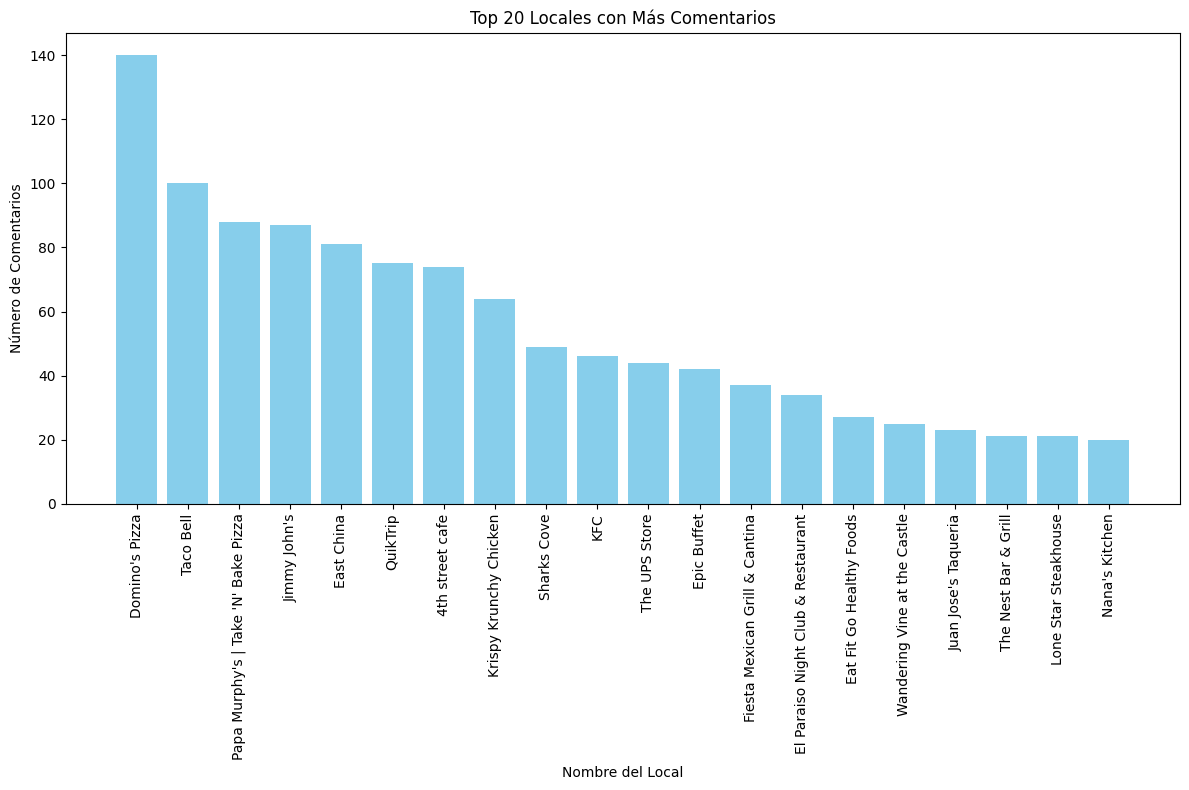

In [23]:
plt.figure(figsize=(12, 8))
plt.bar(top_locals['nombre_local'], top_locals['num_of_reviews'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Número de Comentarios')
plt.title('Top 20 Locales con Más Comentarios')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

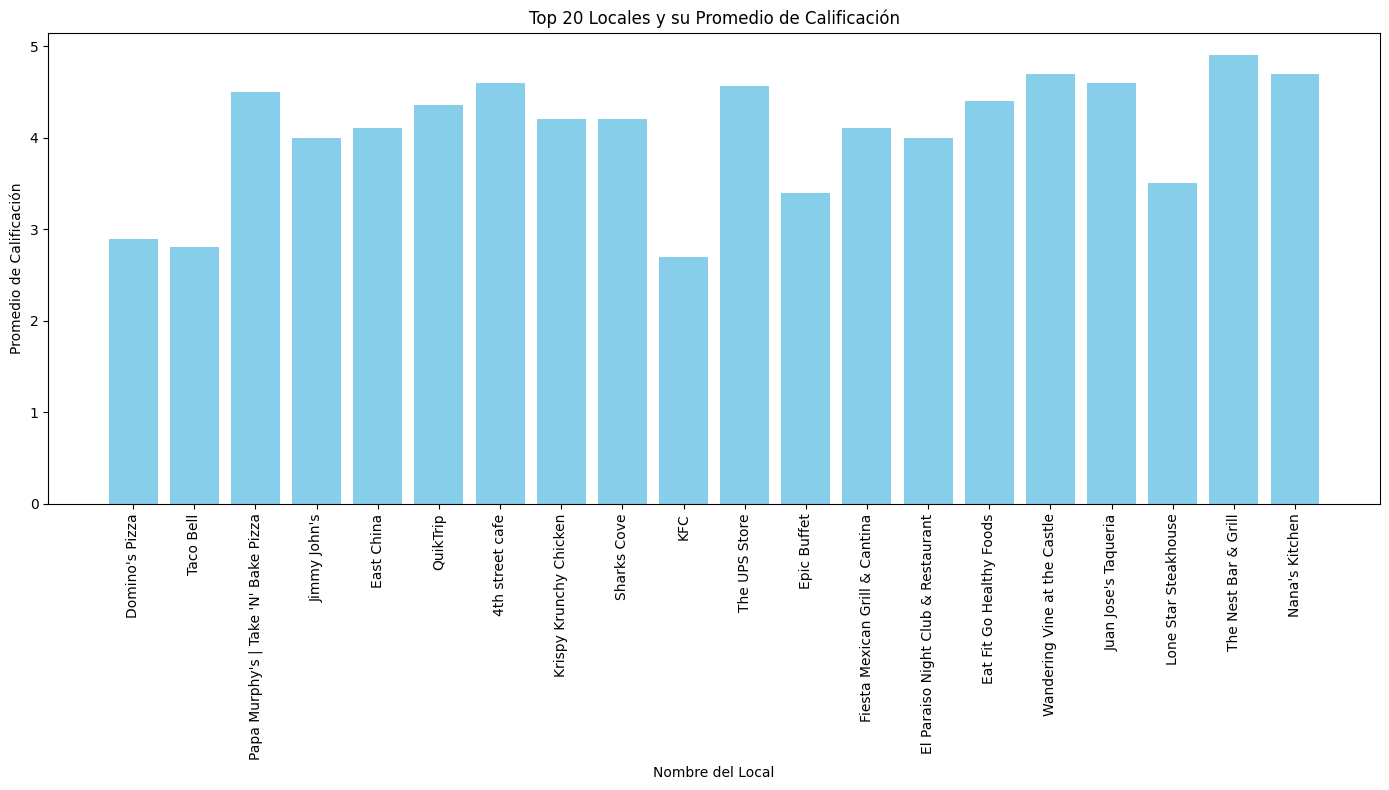

In [24]:
local_comment_counts = merged_df.groupby('nombre_local').agg(
    num_of_reviews=('nombre_local', 'count'),
    avg_rating=('avg_rating', 'mean')
).reset_index()

top_locals = local_comment_counts.sort_values(by='num_of_reviews', ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.bar(top_locals['nombre_local'], top_locals['avg_rating'], color='skyblue')

plt.xlabel('Nombre del Local')
plt.ylabel('Promedio de Calificación')
plt.title('Top 20 Locales y su Promedio de Calificación')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


In [25]:
merged_df.to_csv(r"C:\Users\jessi\Desktop\Proyecto Final Henry\Kansas.csv", index=False)
